## 회귀분석

In [51]:
!pip install scipy
!pip install scikit-learn
!pip install statsmodels

### scipy

In [52]:
from scipy import stats

In [53]:
data = data.reset_index()[['Close']]

#회귀선 기울기, 상수항
slope, intercept, _, _, _, = sp.stats.linregress(data.index, data.Close)
print(slope, intercept)

59.45021894151893 -34121.351849900806


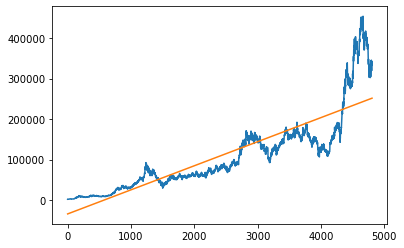

In [54]:
plt.plot(data.index, data.Close)
plt.plot(data.index, data.index * slope + intercept)
plt.show()

### scikit-learn

In [55]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [56]:
#상수항 넣어주기
index= sm.add_constant(data.index)
index

array([[1.000e+00, 0.000e+00],
       [1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00],
       ...,
       [1.000e+00, 4.805e+03],
       [1.000e+00, 4.806e+03],
       [1.000e+00, 4.807e+03]])

In [57]:
model = LinearRegression(fit_intercept=True)
model.fit(index, data.Close)

LinearRegression()

In [58]:
#회귀선 기울기, 상수항
model.coef_, model.intercept_

(array([ 0.        , 59.45021894]), -34121.35184990089)

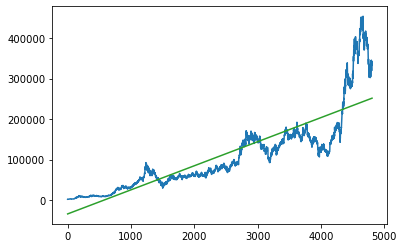

In [59]:
plt.plot(data.index, data.Close)
plt.plot(index, index * model.coef_ + model.intercept_)
plt.show()

### statsmodels

In [60]:
index = sm.add_constant(data.index)
model = sm.OLS(data.Close, index)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                 1.412e+04
Date:                Thu, 07 Apr 2022   Prob (F-statistic):               0.00
Time:                        22:23:29   Log-Likelihood:                -58661.
No. Observations:                4808   AIC:                         1.173e+05
Df Residuals:                    4806   BIC:                         1.173e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.412e+04   1388.528    -24.574      0.000   -3.68e+04   -3.14e+04
x1            59.4502      0.500    118.832      0.000      58.469      60.431
==============================================================================
Omnibus:                     1443.047   Durbin-Watson:                   0.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4740.486
Skew:                           1.512   Prob(JB):                         0.00
Kurtosis:                       6.810   Cond. No.                     5.55e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
result.params

const   -34121.351850
x1          59.450219
dtype: float64

In [62]:
result.rsquared

0.7460788809212038

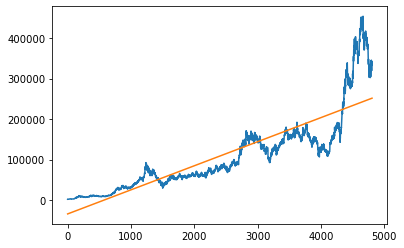

In [63]:
plt.plot(data.index, data.Close)
result.fittedvalues.plot()
plt.show()